In [1]:
import pandas as pd

df = pd.read_json('../data/crawl/vnw.jsonl', lines=True)
df

,_id,url,job_name,company_name,salary,end_date,address,posted_date,job_function,job_industry,job_level,skill,preferred_language,job_description,job_requirements
0,661621edbb86ac211a66e91a,https://www.vietnamworks.com/giang-vien-cong-n...,Giảng Viên Công Nghệ Thông Tin (Swinburne),Đại Học FPT TP.HCM,Thương lượng,2024-04-16,"Lô E2a-7, Đường D1, Khu Công Nghệ Cao, Long Th...",04/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Giáo dục/Đào Tạo,Nhân viên,"Giáo Dục, Công Nghệ Thông Tin, Khoa Học Máy Tí...",Bất kỳ,[[- Giảng dạy/nghiên cứu và các hoạt động chuy...,[[- Tối thiểu tốt nghiệp cao học lãnh vực giản...
1,661621edbb86ac211a66e91c,https://www.vietnamworks.com/it-infrastructure...,IT Infrastructure Operations Expert,Navigos Search,$2000 - $3000,2024-04-19,Hanoi / HCMC,20/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Cứng...",Tài Chính,Nhân viên,AWS Docker,Bất kỳ,"[[- To prevent the incidents & problems, - Man...",[[- A bachelor’s degree in computer science or...
2,661621edbb86ac211a66e927,https://www.vietnamworks.com/junior-backend-de...,Junior Backend Developer,Codeforce VINA,Thương lượng,2024-04-11,"7th floor Saigonbus building, 39 Hai Thuong La...",12/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"MySQL, Typescript, RESTful API Design, Lập Trì...",Bất kỳ,[[Job Description: We are seeking a motivated ...,"[[***Job Requirements:, • Proficiency in backe..."
3,661621edbb86ac211a66e928,https://www.vietnamworks.com/senior-qc-enginee...,Senior QC Engineer,Globee Software & E-Commerce,Tới $1000,2024-04-17,"No. 3 Ba Thang Hai, Ward 11, District 10",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , QA/QC/Sof...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Ecommerce Platforms, Salesforce, Ecommerce Tes...",Tiếng Anh,"[[- Understand the system, analyze the documen...",[[- At least 03 YOE working as QC (auto/manual...
4,661621edbb86ac211a66e92a,https://www.vietnamworks.com/qm-staff-japanese...,"QM Staff (Japanese N2+, Open for IT Comtor)",NEC Vietnam,Thương lượng,2024-04-17,"12th Floor, Gelex Tower, 52 Le Dai Hanh, Hai B...",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , QA/QC/Sof...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"QMS, QMS Management, IT Auditing, IT Risk Mana...",Bất kỳ,"[[Your role & responsibilities:, NECVN perform...","[[Your skills & qualifications:, - Bachelor's ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,6628aee1ebef1caba803300a,https://www.vietnamworks.com/business-analyst-...,Business Analyst,ELCA Information Technology (Vietnam) Limited,Thương lượng,2024-05-23,"15F-19F CII Tower, 152 Dien Bien Phu, Ward 25,...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phân Tích...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"SQL, Business Analysis, UI/UX, UI Mockup, Func...",Tiếng Anh,"[[MISSION], [You will work alongside developer...","[[QUALIFICATIONS], [Required], [- Minimum of 3..."
1350,6628aee1ebef1caba8033010,https://www.vietnamworks.com/network-engineer-...,Network Engineer,"K2 SOLUTIONS CO., LTD.",Thương lượng,2024-05-23,,23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Hệ thống CNTT & Thiết bị,Nhân viên,"Network, CCNP, CCNA, Data Center Management, N...",Tiếng Anh,"[[ABOUT THE POSITION:], [You will be part of K...","[[POSTION REQUIREMENT], [1.\tNetwork Design an..."
1351,6628aee1ebef1caba8033011,https://www.vietnamworks.com/embedded-software...,"Embedded Software Engineer (Autosar, CAN Tools...",Ban Vien Corporation,Thương lượng,2024-05-23,"Ban Vien Tower, 54-56-58 Street 2, Van Phuc Re...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"C/C++, Embedded Software, AUTOSAR, Software En...",Tiếng Anh,[[- Software development for Automotive Domain...,"[[* MUST HAVE], [- Strong in C/C++ programming..."
1352,6628aee1ebef1caba803301d,https://www.vietnamworks.com/it-project-coordi...,IT Project Coordinator,RMIT University Vietnam,$1200 - $1400,2024-05-23,"702 Ngu

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 1354 non-null   object
 1   url                 1354 non-null   object
 2   job_name            1354 non-null   object
 3   company_name        1354 non-null   object
 4   salary              1354 non-null   object
 5   end_date            1354 non-null   object
 6   address             1160 non-null   object
 7   posted_date         1354 non-null   object
 8   job_function        1354 non-null   object
 9   job_industry        1354 non-null   object
 10  job_level           1354 non-null   object
 11  skill               1354 non-null   object
 12  preferred_language  1354 non-null   object
 13  job_description     1354 non-null   object
 14  job_requirements    1354 non-null   object
dtypes: object(15)
memory usage: 158.8+ KB


In [3]:
import re
def remove_nested_list(text):
    text = str(text)
    clean_text = re.sub(r"[\[\]\']", "", text)
    
    return clean_text

df["job_description"] = df["job_description"].apply(lambda x: remove_nested_list(x))
df["job_requirements"] = df["job_requirements"].apply(lambda x: remove_nested_list(x))

In [4]:
df.columns

Index(['_id', 'url', 'job_name', 'company_name', 'salary', 'end_date',
       'address', 'posted_date', 'job_function', 'job_industry', 'job_level',
       'skill', 'preferred_language', 'job_description', 'job_requirements'],
      dtype='object')

In [9]:
cols = [col for col in df.columns if col not in ["_id", "url", "posted_date", "end_date"]]
df.duplicated(subset=cols).sum()

16

In [10]:
df.drop_duplicates(subset=cols, inplace=True)

In [11]:
df.shape

(734, 15)

In [12]:
df

,_id,url,job_name,company_name,salary,end_date,address,posted_date,job_function,job_industry,job_level,skill,preferred_language,job_description,job_requirements
0,661621edbb86ac211a66e91a,https://www.vietnamworks.com/giang-vien-cong-n...,Giảng Viên Công Nghệ Thông Tin (Swinburne),Đại Học FPT TP.HCM,Thương lượng,2024-04-16,"Lô E2a-7, Đường D1, Khu Công Nghệ Cao, Long Th...",04/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Giáo dục/Đào Tạo,Nhân viên,"Giáo Dục, Công Nghệ Thông Tin, Khoa Học Máy Tí...",Bất kỳ,- Giảng dạy/nghiên cứu và các hoạt động chuyên...,- Tối thiểu tốt nghiệp cao học lãnh vực giảng ...
1,661621edbb86ac211a66e91c,https://www.vietnamworks.com/it-infrastructure...,IT Infrastructure Operations Expert,Navigos Search,$2000 - $3000,2024-04-19,Hanoi / HCMC,20/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Cứng...",Tài Chính,Nhân viên,AWS Docker,Bất kỳ,"- To prevent the incidents & problems, - Manag...",- A bachelor’s degree in computer science or a...
2,661621edbb86ac211a66e927,https://www.vietnamworks.com/junior-backend-de...,Junior Backend Developer,Codeforce VINA,Thương lượng,2024-04-11,"7th floor Saigonbus building, 39 Hai Thuong La...",12/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"MySQL, Typescript, RESTful API Design, Lập Trì...",Bất kỳ,Job Description: We are seeking a motivated an...,"***Job Requirements:, • Proficiency in backend..."
3,661621edbb86ac211a66e928,https://www.vietnamworks.com/senior-qc-enginee...,Senior QC Engineer,Globee Software & E-Commerce,Tới $1000,2024-04-17,"No. 3 Ba Thang Hai, Ward 11, District 10",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , QA/QC/Sof...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Ecommerce Platforms, Salesforce, Ecommerce Tes...",Tiếng Anh,"- Understand the system, analyze the documenta...","- At least 03 YOE working as QC (auto/manual),..."
4,661621edbb86ac211a66e92a,https://www.vietnamworks.com/qm-staff-japanese...,"QM Staff (Japanese N2+, Open for IT Comtor)",NEC Vietnam,Thương lượng,2024-04-17,"12th Floor, Gelex Tower, 52 Le Dai Hanh, Hai B...",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , QA/QC/Sof...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"QMS, QMS Management, IT Auditing, IT Risk Mana...",Bất kỳ,"Your role & responsibilities:, NECVN performs ...","Your skills & qualifications:, ""- Bachelors de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,6628aee1ebef1caba803300a,https://www.vietnamworks.com/business-analyst-...,Business Analyst,ELCA Information Technology (Vietnam) Limited,Thương lượng,2024-05-23,"15F-19F CII Tower, 152 Dien Bien Phu, Ward 25,...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phân Tích...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"SQL, Business Analysis, UI/UX, UI Mockup, Func...",Tiếng Anh,"MISSION, You will work alongside developers wi...","QUALIFICATIONS, Required, - Minimum of 3 years..."
1350,6628aee1ebef1caba8033010,https://www.vietnamworks.com/network-engineer-...,Network Engineer,"K2 SOLUTIONS CO., LTD.",Thương lượng,2024-05-23,,23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Hệ thống CNTT & Thiết bị,Nhân viên,"Network, CCNP, CCNA, Data Center Management, N...",Tiếng Anh,"ABOUT THE POSITION:, You will be part of K2 So...","POSTION REQUIREMENT, 1.\tNetwork Design and Im..."
1351,6628aee1ebef1caba8033011,https://www.vietnamworks.com/embedded-software...,"Embedded Software Engineer (Autosar, CAN Tools...",Ban Vien Corporation,Thương lượng,2024-05-23,"Ban Vien Tower, 54-56-58 Street 2, Van Phuc Re...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"C/C++, Embedded Software, AUTOSAR, Software En...",Tiếng Anh,"- Software development for Automotive Domain.,...","* MUST HAVE, - Strong in C/C++ programming for..."
1352,6628aee1ebef1caba803301d,https://www.vietnamworks.com/it-project-coordi...,IT Project Coordinator,RMIT University Vietnam,$1200 - $1400,2024-05-23,"70

In [14]:
df.to_json('../data/preprocessed/preprocessed_vnw.jsonl', orient='records', lines=True)

<Axes: xlabel='job_function'>

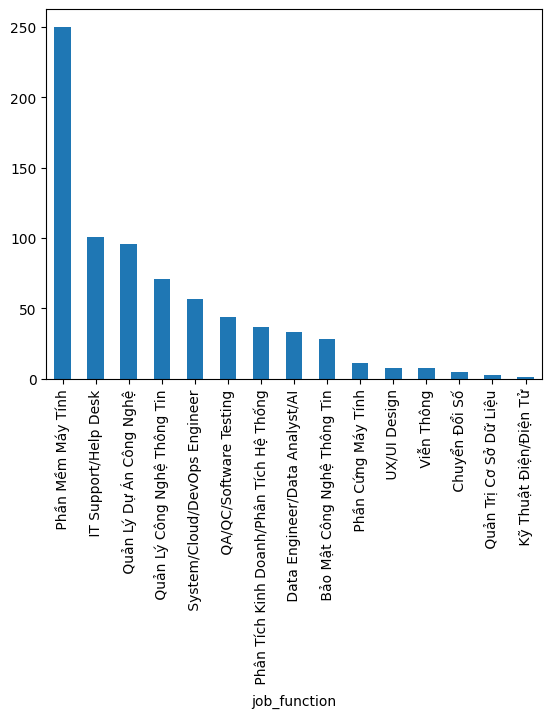

In [10]:
df["job_function"].apply(lambda x: x.split(",  > ,")[-1]).value_counts().plot(kind="bar")

In [15]:
df.sort_values(by="company_name", ascending=False)

,_id,url,job_name,company_name,salary,end_date,address,posted_date,job_function,job_industry,job_level,skill,preferred_language,job_description,job_requirements
0,661621edbb86ac211a66e91a,https://www.vietnamworks.com/giang-vien-cong-n...,Giảng Viên Công Nghệ Thông Tin (Swinburne),Đại Học FPT TP.HCM,Thương lượng,2024-04-16,"Lô E2a-7, Đường D1, Khu Công Nghệ Cao, Long Th...",04/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Giáo dục/Đào Tạo,Nhân viên,"Giáo Dục, Công Nghệ Thông Tin, Khoa Học Máy Tí...",Bất kỳ,- Giảng dạy/nghiên cứu và các hoạt động chuyên...,- Tối thiểu tốt nghiệp cao học lãnh vực giảng ...
501,661621edbb86ac211a66eb42,https://www.vietnamworks.com/giang-vien-cong-n...,Giảng Viên Công Nghệ Thông Tin (Software Engin...,Đại Học FPT TP.HCM,$1000 - $2000,2024-04-26,"Lô E2a-7, Đường D1, Khu Công Nghệ Cao, Long Th...",27/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý C...",Giáo dục/Đào Tạo,Nhân viên,"Công Nghệ Thông Tin, Công Nghệ Phần Mềm, Softw...",Bất kỳ,- Giảng dạy các môn học thuộc chuyên ngành côn...,- Tốt nghiệp Thạc sĩ chuyên ngành công nghệ ph...
297,661621edbb86ac211a66ea3b,https://www.vietnamworks.com/giang-vien-cong-n...,Giảng Viên Công Nghệ Thông Tin (Greenwich),Đại Học FPT TP.HCM,Thương lượng,2024-04-16,"Lô E2a-7, Đường D1, Khu Công Nghệ Cao, Long Th...",04/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Giáo dục/Đào Tạo,Nhân viên,"Giảng Dạy, Công Nghệ Thông Tin, Khoa Học Máy T...",Bất kỳ,- Thực hiện nghiêm túc các công việc thuộc thẩ...,"- Bằng cấp: Thạc sĩ, Tiến sĩ (được đào tạo tại..."
468,661621edbb86ac211a66eaef,https://www.vietnamworks.com/it-manager-it-man...,IT Manager (IT Management - Helpdesk - Cyber S...,Ziku Global,$500 - $1300,2024-04-26,"The Vista building, No. 628C Vo Nguyen Giap S...",27/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý C...",Tài Chính,Nhân viên,"IT Helpdesk, Cyber Security Analysis, English ...",Tiếng Anh,Job description: The IT Manager is tasked with...,"General Requirements:, -\tGraduated from Unive..."
152,661621edbb86ac211a66e992,https://www.vietnamworks.com/it-helpdesk-below...,IT Helpdesk (Below 1-Year Experience),Wise-Concetti Ltd.,Thương lượng,2024-04-21,"Tầng 3, Tòa nhà Kinh Đô, 93 Lò Đúc, Hai Bà Trư...",22/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , IT Suppor...",Phần Mềm CNTT/Dịch vụ Phần mềm,Mới Tốt Nghiệp,"IT Operations, Network Management, Helpdesk, I...",Tiếng Anh,We are looking for an IT Helpdesk for our IT D...,"•\tAge: under 30, •\tGood command of spoken an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,661621edbb86ac211a66e931,https://www.vietnamworks.com/it-officer-hcm-he...,IT Officer (HCM Head Office - 381),"AEONMALL Vietnam Co., Ltd.",$400 - $600,2024-04-24,HQ: 3rd Floor – East Office of AEON MALL Long ...,25/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , IT Suppor...",Bất Động Sản/Cho thuê,Mới Tốt Nghiệp,"Software Installation, IT Helpdesk, System Con...",Tiếng Anh,"AEONMALL Vietnam Co., Ltd is a core enterprise...","""1. College or Bachelors degree in IT or relev..."
8,661621edbb86ac211a66e93c,https://www.vietnamworks.com/chuyen-gia-quan-t...,Chuyên Gia Quản Trị Kiến Trúc - Khối Công Nghệ,ABBANK - Ngân Hàng TMCP An Bình,$1500 - $2500,2024-04-10,"Số 36 Hoàng Cầu, Phường Ô Chợ Dừa, Quận Đống Đ...",11/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý C...",Ngân hàng,Nhân viên,"DevOps, Cloud, API",Bất kỳ,"Lập kế hoạch, quản lý, kiểm soát và thực hiện ...",-Kinh nghiệm công tác trên 5 năm. Tốt nghiệp c...
71,661621edbb86ac211a66e96c,https://www.vietnamworks.com/application-manag...,Application Manager Card System,ABBANK - Ngân Hàng TMCP An Bình,$1000 - $2000,2024-04-20,"Số 36 Hoàng Cầu, Phường Ô Chợ Dừa, Quận Đống Đ...",21/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý C...",Ngân hàng,Nhân viên,"Card Payment Technology, Application Engineering",Bất kỳ,"-Giám sát vận hành hệ thống thẻ, kênh thanh to...",-Có khả năng vận hành hệ thống chuyển mạch gia...
357,661621edbb86ac211a66ea75,https://www

In [17]:
df[df["job_name"].str.contains("AI")]

,_id,url,job_name,company_name,salary,end_date,address,posted_date,job_function,job_industry,job_level,skill,preferred_language,job_description,job_requirements
216,661621edbb86ac211a66e9df,https://www.vietnamworks.com/senior-ai-enginee...,Senior AI Engineer (French Speaking),Navigos Search's Client,Thương lượng,2024-04-06,Hanoi / HCMC,07/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Artificial Intelligence, Machine Learning, French",Bất kỳ,We are an international company headquartered ...,"""- Hold a Bachelors or Masters degree in Compu..."
396,661621edbb86ac211a66eac8,https://www.vietnamworks.com/product-manager-d...,Product Manager - Digital Identity & Payment A...,Trusting Social,Thương lượng,2024-04-14,"Havana Tower, 132, Ham Nghi Str., Ben Thanh Wa...",15/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý D...",Phần Mềm CNTT/Dịch vụ Phần mềm,Trưởng phòng,"Product Management, Face recognition, Payment ...",Bất kỳ,As a Product Manager in Digital Identity & Pay...,"Must have, - 4+ years of experience in product..."
468,661621edbb86ac211a66eaef,https://www.vietnamworks.com/it-manager-it-man...,IT Manager (IT Management - Helpdesk - Cyber S...,Ziku Global,$500 - $1300,2024-04-26,"The Vista building, No. 628C Vo Nguyen Giap S...",27/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý C...",Tài Chính,Nhân viên,"IT Helpdesk, Cyber Security Analysis, English ...",Tiếng Anh,Job description: The IT Manager is tasked with...,"General Requirements:, -\tGraduated from Unive..."
602,661621edbb86ac211a66eb5b,https://www.vietnamworks.com/senior-product-de...,Senior Product Development Specialist - Digita...,Trusting Social,Thương lượng,2024-04-14,"Havana Tower, 132, Ham Nghi Str., Ben Thanh Wa...",15/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Quản Lý D...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Face recognition, Product Development, B2B Bus...",Bất kỳ,"""As a Senior Product Development Specialist in...","Minimum, - Good command of Vietnamese, - 3+ ye..."
810,661621edbb86ac211a66ec97,https://www.vietnamworks.com/ai-manager--17599...,AI Manager,Got It,Thương lượng,2024-04-28,"9-11 Nguyễn Văn Thủ, P. Đa Kao, Quận 1, TP. Hồ...",29/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Trưởng phòng,"TensorFlow, Computer Science, Application Deve...",Bất kỳ,"What you need to do:, - Lead and deliver AI so...","""- Bachelors degree in Computer Science, Elect..."
1174,661621f5bb86ac211a66ee2e,https://www.vietnamworks.com/ai-manager-ocr-nl...,AI Manager (Ocr/nlp),Got It,$3000 - $4000,2024-04-28,"9-11 Nguyễn Văn Thủ, P. Đa Kao, Quận 1, TP. Hồ...",29/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Trưởng phòng,"TensorFlow, Computer Science, Application Deve...",Bất kỳ,"What you need to do:, - Lead and deliver AI so...","""- Bachelors degree in Computer Science, Elect..."
1254,6621fccbba2b5e84ae69720b,https://www.vietnamworks.com/ai-engineer--1764...,AI Engineer,Est Rouge,$500 - $2000,2024-05-10,None,10/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Data Engi...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Python, Machine Learning, Data Analysis, Busin...",Tiếng Việt,"""Hey there! Were super excited to find an amaz...","""Bachelors Degree"", 3 to 5 years of experience..."
1260,6621fccbba2b5e84ae697211,https://www.vietnamworks.com/vingroup-chuong-t...,[Vingroup] Chương Trình Đào Tạo Kỹ Sư AI,Viện Nghiên Cứu Dữ Liệu Lớn Vinbigdata – Công ...,Thương lượng,2024-05-10,None,10/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Data Engi...",Phần Mềm CNTT/Dịch vụ Phần mềm,Mới Tốt Nghiệp,"Big Data, Trí Tuệ Nhân Tạo, An Ninh Dữ Liệu, Đ...",Bất kỳ,Chương trình Đào tạo Kỹ sư AI Vingroup được ...,"***HÌNH THỨC XÉT TUYỂN, Ứng viên đăng ký ứng t..."
1281,6625ce9e0b97920405b5c4f8,https://www.vietnamworks.com/ai-engineer-open-...,AI Engineer (Open for Fresher),Navigos Search,Thương lượng,2024-05-19,None,19/04/2024,"Công Nghệ Thông Tin/V

In [12]:
df["preferred_language"].value_counts()

preferred_language
Bất kỳ              444
Tiếng Anh           277
Tiếng Việt           24
Tiếng Nhật            6
Tiếng Trung Quốc      2
Name: count, dtype: int64

In [13]:
df[df["preferred_language"] == "Tiếng Anh"]

,_id,url,job_name,company_name,salary,end_date,address,posted_date,job_function,job_industry,job_level,skill,preferred_language,job_description,job_requirements
3,661621edbb86ac211a66e928,https://www.vietnamworks.com/senior-qc-enginee...,Senior QC Engineer,Globee Software & E-Commerce,Tới $1000,2024-04-17,"No. 3 Ba Thang Hai, Ward 11, District 10",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , QA/QC/Sof...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Ecommerce Platforms, Salesforce, Ecommerce Tes...",Tiếng Anh,"- Understand the system, analyze the documenta...","- At least 03 YOE working as QC (auto/manual),..."
5,661621edbb86ac211a66e931,https://www.vietnamworks.com/it-officer-hcm-he...,IT Officer (HCM Head Office - 381),"AEONMALL Vietnam Co., Ltd.",$400 - $600,2024-04-24,HQ: 3rd Floor – East Office of AEON MALL Long ...,25/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , IT Suppor...",Bất Động Sản/Cho thuê,Mới Tốt Nghiệp,"Software Installation, IT Helpdesk, System Con...",Tiếng Anh,"AEONMALL Vietnam Co., Ltd is a core enterprise...","""1. College or Bachelors degree in IT or relev..."
11,661621edbb86ac211a66e94b,https://www.vietnamworks.com/it-specialist-dig...,"IT Specialist, Digital Workplace","Gentherm Vietnam CO., LTD.",Thương lượng,2024-05-01,"Road No.4&5, Dong Van II Industrial Zone, Duy ...",01/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , IT Suppor...",Sản xuất,Nhân viên,"IT Helpdesk, Microsoft Office, IT Infrastructu...",Tiếng Anh,"Scope of Position:, • Provides effective IT su...","Experience: 2 years in related job, Competenci..."
16,661621edbb86ac211a66e921,https://www.vietnamworks.com/python-test-autom...,Python Test Automation Framework Engineer,LG Electronics Development Viet Nam Company Li...,$1000 - $2200,2024-04-10,"Tầng 32 & 34, tòa nhà Keangnam Landmark 72, đư...",11/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"Python, Linux, JavaScript, QML, Embedded",Tiếng Anh,•\tMaintain and develop new features for testi...,"""•\tBachelors degree in computer science / eng..."
18,661621edbb86ac211a66e92d,https://www.vietnamworks.com/starcamp-security...,StarCamp Security Engineer (Fresher),NAB Innovation Centre Vietnam,Thương lượng,2024-04-17,"364 Cong Hoa, Ward 13, Tan Binh Street, Ho Chi...",18/03/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Mới Tốt Nghiệp,"Information Technology, Penetration Testing, D...",Tiếng Anh,"ABOUT THE JOB, Security is one of the fastest ...",We are looking for some great new talent to jo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,6628aee1ebef1caba803300a,https://www.vietnamworks.com/business-analyst-...,Business Analyst,ELCA Information Technology (Vietnam) Limited,Thương lượng,2024-05-23,"15F-19F CII Tower, 152 Dien Bien Phu, Ward 25,...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phân Tích...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"SQL, Business Analysis, UI/UX, UI Mockup, Func...",Tiếng Anh,"MISSION, You will work alongside developers wi...","QUALIFICATIONS, Required, - Minimum of 3 years..."
1350,6628aee1ebef1caba8033010,https://www.vietnamworks.com/network-engineer-...,Network Engineer,"K2 SOLUTIONS CO., LTD.",Thương lượng,2024-05-23,,23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , System/Cl...",Hệ thống CNTT & Thiết bị,Nhân viên,"Network, CCNP, CCNA, Data Center Management, N...",Tiếng Anh,"ABOUT THE POSITION:, You will be part of K2 So...","POSTION REQUIREMENT, 1.\tNetwork Design and Im..."
1351,6628aee1ebef1caba8033011,https://www.vietnamworks.com/embedded-software...,"Embedded Software Engineer (Autosar, CAN Tools...",Ban Vien Corporation,Thương lượng,2024-05-23,"Ban Vien Tower, 54-56-58 Street 2, Van Phuc Re...",23/04/2024,"Công Nghệ Thông Tin/Viễn Thông, > , Phần Mềm ...",Phần Mềm CNTT/Dịch vụ Phần mềm,Nhân viên,"C/C++, Embedded Software, AUTOSAR, Software En...",Tiếng Anh,"- Software development for Automotive Domain.,...","* MUST HAVE, - Strong in C/C

In [14]:
import spacy
from spacy_cld import LanguageDetector

from tqdm import tqdm 

In [15]:
nlp = spacy.load('en_core_web_sm')
language_detector = LanguageDetector()
nlp.add_pipe(language_detector)

In [16]:
import string

import re
from pprint import pprint

# Define the characters to remove
RE_BAD_CHARACTERS = re.compile(r'[\x00-\x1f\x7f-\x9f]')

def remove_bad_chars(text):
    return RE_BAD_CHARACTERS.sub("", text)

def detect_lang(text):
    doc = nlp(remove_bad_chars(text[:50]))
    return doc._.languages[0] if doc._.languages else "unknown"

In [18]:
df["lang"] = df["job_description"].apply(detect_lang)
df[["job_description", "lang"]].sample(10)

,job_description,lang
189,"1.\tDesign and Layout:, •\tUtilize CAD (allegr...",en
1269,"Job Descriptions:, •\tChatbot Localisation: Re...",en
1174,"What you need to do:, - Lead and deliver AI so...",en
107,"As a Techno-Functional Consultant, you will le...",en
102,"What’s this role about?, • Analyzing users st...",en
248,You will help us build the ideal data ecosyste...,en
64,"ĐỊA CHỈ LÀM VIỆC: VP Công ty PAC - Tầng 2, Thá...",vi
861,LG CNS Việt Nam đang tìm kiếm vị trí Chuyên Vi...,vi
642,"Công việc chính bao gồm:, - Xây dựng, phát tri...",vi
725,This position will work closely with business ...,en
